In [5]:
import pandas as pd 

# Lee el archivo
data = pd.read_csv('tabla_punto1.csv') 
# Preview the first 5 lines of the loaded data 
data.head()

,PRONOSTICO,TEMPERATURA,HUMEDAD,VIENTO,ASADO
0,Soleado,Calor,Alta,leve,no
1,Soleado,Calor,Alta,fuerte,no
2,Nublado,Calor,Alta,leve,si
3,Lluvioso,templado,Alta,leve,si
4,Lluvioso,Frio,normal,leve,si


In [27]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for column_name in data.columns:
  if (data[column_name].dtype == object) & (column_name!='type'):
    data[column_name] = le.fit_transform(data[column_name])

data.head()

,PRONOSTICO,TEMPERATURA,HUMEDAD,VIENTO,ASADO
0,2,0,0,1,0
1,2,0,0,0,0
2,1,0,0,1,1
3,0,2,0,1,1
4,0,1,1,1,1


In [33]:
# Separo "a mano" festures de target

# Features
feature_names = list(data.columns)
# Elimino type porque es la clase
feature_names.remove('ASADO')
x = data[feature_names]

# Target
y = data.ASADO
le.fit(data['ASADO'])
target_names=le.classes_
x
y


0    0
1    0
2    1
3    1
4    1
5    0
6    1
7    0
Name: ASADO, dtype: int32

In [34]:
from sklearn import tree

arbol = tree.DecisionTreeClassifier(criterion='entropy')

arbol = arbol.fit(x, y)

#Importamos la librería
import graphviz

dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                label='all',
                                filled=True, rounded=True,
                                special_characters=True)  

# Capturo el source
graph = graphviz.Source(dot_data)

# Muestro el contenido de graph
graph

TypeError: can only concatenate str (not "numpy.int32") to str

In [10]:
data.shape

(8, 5)

[Text(167.4, 199.32, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'), Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'), Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'), Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'), Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'), Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'), Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'), Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'), Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 

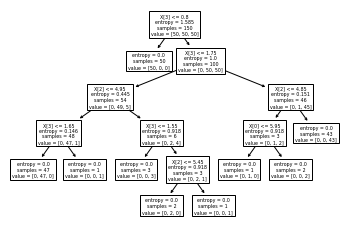

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

from sklearn import tree

# Instanciamos el árbol como un árbol de clasificación (existen varias técnicas basadas en árboles)
# Definimos que el criterio a utilizar para el entrenamiento es la entropia (Podría ser Gini, por ejemplo)
arbol = tree.DecisionTreeClassifier(criterion='entropy')

arbol = arbol.fit(iris.data, iris.target)

grafico=tree.plot_tree(arbol)

print(grafico)

